In [2]:
import numpy as np
import pandas as pd
import pickle as pkl
from os.path import join as pjoin
from scipy.stats import sem
from matplotlib import pyplot as plt
from magicbox.algorithm.plot import show_bar_value
from nibrain.util.plotfig import auto_bar_width

proj_dir = '/nfs/t3/workingshop/chenxiayu/study/FFA_pattern'
anal_dir = pjoin(proj_dir, 'analysis/s2/1080_fROI/refined_with_Kevin')
work_dir = pjoin(anal_dir, 'paper_fig')

# 画出各分组人数百分比

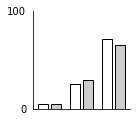

In [21]:
figsize = (2, 1.8)
n_subj = 1080
gids = (0, 1, 2)
gnames = ('single', 'two-C', 'two-S')
n_gid = len(gids)
hemis = ('lh', 'rh')
n_hemi = len(hemis)
hemi2color = {'lh': 'w', 'rh': (0.8, 0.8, 0.8, 1)}
gid_file = pjoin(anal_dir, 'grouping/group_id_{hemi}.npy')
out_file = None
# out_file = pjoin(work_dir, 'grouping_incidence_rate.jpg')

x = np.arange(n_gid)
width = auto_bar_width(x, n_hemi)
offset = -(n_hemi - 1) / 2
_, ax = plt.subplots(figsize=figsize)
for hemi in hemis:
    gid_vec = np.load(gid_file.format(hemi=hemi))
    assert len(gid_vec) == n_subj
    y = np.zeros(n_gid, np.float64)
    for gid_idx, gid in enumerate(gids):
        y[gid_idx] = np.mean(gid_vec == gid) * 100
    rects = ax.bar(x+1.2*width*offset, y, width, label=hemi,
                   fc=hemi2color[hemi], ec='k')
    # show_bar_value(rects, '.1f')
    offset += 1
# ax.legend()
# ax.set_xlabel('FFA configuration')
# ax.set_xticks(x)
# ax.set_xticklabels(gnames)
# ax.set_ylabel('Percentage of population')
ax.set_yticks([0, 100])
ax.set_yticklabels([0, 100])
ax.tick_params(bottom=False, labelbottom=False, left=False)
# ax.set_title('incidence rates')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
if out_file is None:
    plt.show()
else:
    plt.savefig(out_file)

# 画surface area

lh_pFus1: 0
lh_pFus2: 0
lh_mFus1: 0
lh_mFus2: 0
rh_pFus1: 0
rh_pFus2: 0
rh_mFus1: 0
rh_mFus2: 0


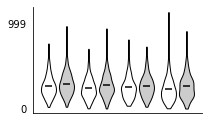

In [70]:
# figsize = None
figsize = (3, 1.8)
data_file = pjoin(anal_dir, 'structure/rois_v3_{hemi}_va.pkl')
hemis = ('lh', 'rh')
n_hemi = len(hemis)
hemi2color = {'lh': 'w', 'rh': (0.8, 0.8, 0.8, 1)}
rois = ('pFus-face', 'mFus-face')
n_roi = len(rois)
gids = (1, 2)
n_gid = len(gids)
gid_file = pjoin(anal_dir, 'grouping/group_id_{hemi}.npy')
# out_file = None
out_file = pjoin(work_dir, 'grouping_surface_area.jpg')

x = np.arange(n_roi * n_gid)
width = auto_bar_width(x, n_hemi)
offset = -(n_hemi - 1) / 2
_, ax = plt.subplots(figsize=figsize)
xticklabels = []
for hemi_idx, hemi in enumerate(hemis):
    data = pkl.load(open(data_file.format(hemi=hemi), 'rb'))
    gid_vec = np.load(gid_file.format(hemi=hemi))
    y = np.zeros_like(x)
    y_err = np.zeros_like(x)
    x_idx = 0
    dataset = []
    for roi in rois:
        roi_idx = data['roi'].index(roi)
        meas_vec = data['meas'][roi_idx]
        for gid in gids:
            xticklabel = f"{roi.split('-')[0]}{gid}"
            meas_tmp = meas_vec[gid_vec == gid]
            nan_idx_vec = np.isnan(meas_tmp)
            print(f'{hemi}_{xticklabel}:', np.sum(nan_idx_vec))
            meas_tmp = meas_tmp[~nan_idx_vec]
            y[x_idx] = np.mean(meas_tmp)
            y_err[x_idx] = sem(meas_tmp)
            dataset.append(meas_tmp)
            x_idx += 1
            if hemi_idx == 1:
                xticklabels.append(xticklabel)
    x_tmp = x+1.2*width*offset
    # rects = ax.bar(x_tmp, y, width, yerr=y_err,
    #                label=hemi, fc=hemi2color[hemi], ec='k')
    # show_bar_value(rects)
    violins = ax.violinplot(dataset, x_tmp, widths=width,
                            showmeans=True, showextrema=False)
    for pc in violins['bodies']:
        pc.set_facecolor(hemi2color[hemi])
        pc.set_edgecolor('k')
        pc.set_alpha(1)
    violins['cmeans'].set_color('k')
    # ax.scatter(x_tmp, y, marker='o', color='r', s=30, zorder=2)
    # ax.vlines(x_tmp, y-y_err, y+y_err, color='k', linestyle='-', lw=5, zorder=1)
    offset += 1
# ax.set_xticks(x)
# ax.set_xticklabels(xticklabels)
ax.set_yticks([0, 999])
ax.set_yticklabels([0, 999])
# ax.set_ylabel('mm^2')
# ax.set_ylim(200)
ax.tick_params(bottom=False, labelbottom=False, left=False)
# ax.set_title('Surface area')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.legend()
plt.tight_layout()
if out_file is None:
    plt.show()
else:
    plt.savefig(out_file)

# 画测地距离

#lh_pFus-mFus: 1032
#rh_pFus-mFus: 1029


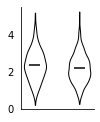

In [10]:
# figsize = None
figsize = (1.5, 1.8)
hemis = ('lh', 'rh')
n_hemi = len(hemis)
items = ('pFus-mFus',)
n_item = len(items)
item2color = {'pFus-mFus': 'w'}
data_file = pjoin(anal_dir, 'gdist_peak.csv')
# out_file = None
out_file = pjoin(work_dir, 'geodesic_distance.jpg')

df = pd.read_csv(data_file)
_, ax = plt.subplots(figsize=figsize)
x = np.arange(n_hemi)
width = auto_bar_width(x, n_item)
offset = -(n_item - 1) / 2
for item in items:
    ys = np.zeros(n_hemi)
    yerrs = np.zeros(n_hemi)
    dataset = []
    for hemi_idx, hemi in enumerate(hemis):
        col = hemi + '_' + item
        data = np.array(df[col])
        data = data[~np.isnan(data)] / 10
        print(f'#{col}: {len(data)}')
        ys[hemi_idx] = np.mean(data)
        yerrs[hemi_idx] = sem(data)
        dataset.append(data)
    x_tmp = x + 1.2 * width * offset

    # plot bar
    # rects = ax.bar(x_tmp, ys, width, yerr=yerrs, label=item,
    #                fc=item2color[item], ec='k')
    # show_bar_value(rects, '.2f')

    # plot violin
    violins = ax.violinplot(dataset, x_tmp, widths=width,
                            showmeans=True, showextrema=False)
    for pc in violins['bodies']:
        pc.set_facecolor(item2color[item])
        pc.set_edgecolor('k')
        pc.set_alpha(1)
    violins['cmeans'].set_color('k')

    offset += 1
# ax.legend()
# ax.set_xticks(x)
# ax.set_xticklabels(hemis)
# ax.set_ylabel('cm')
# ax.set_title('cortical distance\nbetween pFus and mFus')
ax.tick_params(bottom=False, labelbottom=False, left=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
if out_file is None:
    plt.show()
else:
    plt.savefig(out_file)